c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


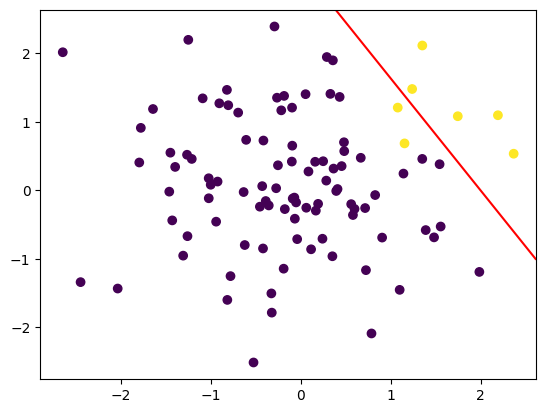

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
X = torch.randn(100, 2)
y = ((X[:, 0] > 0.5) & (X[:, 1] > 0.5)).float()

# 모델 정의
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return F.sigmoid(outputs)

model = LogisticRegression(input_dim=2, output_dim=1)

# 모델 학습
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred.squeeze(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 결정 경계 그리기
plt.scatter(X[:, 0], X[:, 1], c=y)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='r')
plt.show()